# Árbol de decisión

## Columnas:
*  credit.policy: 1 si el cliente cumple con los criterios de suscripción de crédito de LendingClub.com, y 0 en caso contrario.

* purpose: El propósito del préstamo (toma los valores "tarjeta_de_crédito", "consolidación_deuda", "educativo", "compra_principal", "pequeña_empresa" y "todos_otros").

* int.rate: La tasa de interés del préstamo, como una proporción (una tasa del 11% se almacenaría como 0,11). A los prestatarios que LendingClub.com considera más riesgosos se les asignan tasas de interés más altas.

* installment: Las cuotas mensuales adeudadas por el prestatario si el préstamo está financiado.

* log.annual.inc: El logaritmo natural de los ingresos anuales autoinformados del prestatario.

* dti: La relación deuda-ingresos del prestatario (monto de la deuda dividido por los ingresos anuales).

* fico: La calificación crediticia FICO del prestatario.

* days.with.cr.line: El número de días que el prestatario ha tenido una línea de crédito.

* revol.bal: saldo renovable del prestatario (monto impago al final del ciclo de facturación de la tarjeta de crédito).

* revol.util: Tasa de utilización de la línea renovable del prestatario (la cantidad de la línea de crédito utilizada en relación con el crédito total disponible).

* inq.last.6mths: el número de consultas del prestatario por parte de los acreedores en los últimos 6 meses.

* delinq.2yrs: El número de veces que el prestatario ha estado atrasado más de 30 días en un pago en los últimos 2 años.

* pub.rec: el número de registros públicos despectivos del prestatario (declaraciones de quiebra, gravámenes fiscales o sentencias). 

* not.fully.paid (target):  1 si incumplio al pago y 0 si cumplio con el pago

# Importación de librerías


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Carga de los datos

In [ ]:
df = pd.read_csv('/loan_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Análisis exploratorio (EDA)

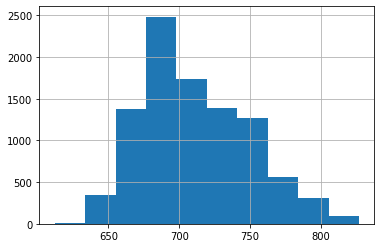

In [ ]:
df['fico'].hist()

** Genere un mapa de calor con las relaciones que hay entre variables**

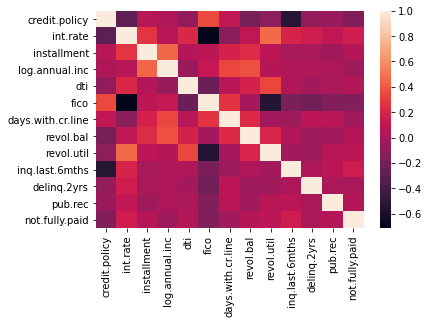

In [ ]:
sns.heatmap(df.corr())

# Preprocesamiento


## Características categóricas

In [ ]:
df_dum = pd.get_dummies(data=df, columns=['purpose'])

In [ ]:
df_dum.shape

(9578, 20)

In [ ]:
df_dum.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


## Partición del dataset

In [ ]:
cols=[col for col in df_dum.columns if col not in ['purpose_all_other', 'not.fully.paid']]
cols

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [ ]:
X=df_dum[cols]
y=df_dum['not.fully.paid']

In [ ]:
print(df.shape, X.shape, y.shape)

(9578, 14) (9578, 18) (9578,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Entrenamiento del Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=5)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predicciones y Evaluación del Árbol de decisión

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy_score(y_pred=model.predict(X_test),y_true=y_test)

0.8282189180639038

In [ ]:
confusion_matrix(y_pred=model.predict(X_test),y_true=y_test)

array([[2612,    9],
       [ 534,    6]])

## Visualización del Árbol de decisión

In [ ]:
import graphviz
from sklearn.tree import plot_tree, export_graphviz

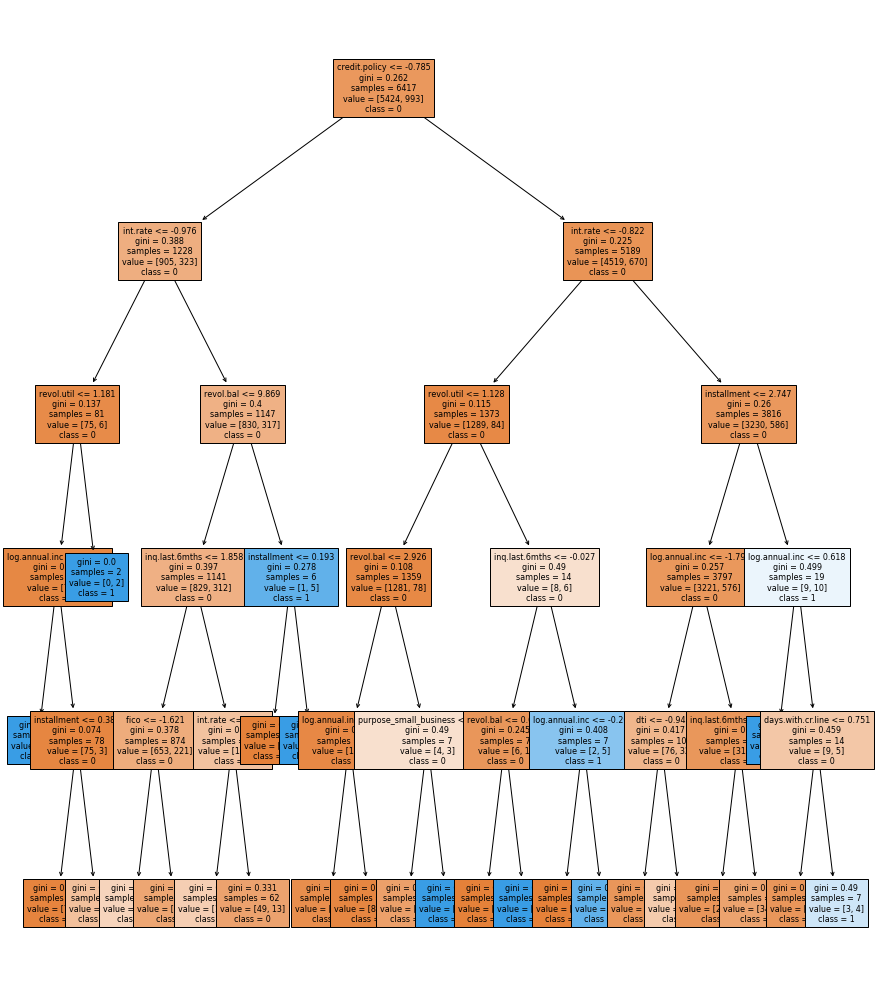

In [ ]:
fig = plt.figure(figsize=(15,18))
_ = plot_tree(model,
                   feature_names=cols,
                   class_names=['0','1'],
                   filled=True,fontsize=8)